# Get feature importance / SHAP values

In [1]:
import numpy as np
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as pl
import ml_help
from time import time
import seaborn as sns
sns.set_theme()

In [2]:
df = pd.read_csv("./data/gardiner_count_incidents.csv.zip")
df

,volume_15min,number_of_lanes,dist_from_mid_point,magnitudeOfDelay,length,delay,day,hour,minute,direction_E,...,month_10,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,160.0,3.0,4.887837,0.0,0.0,0.0,11.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,170.0,3.0,0.474912,0.0,0.0,0.0,11.0,15.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,169.0,3.0,-0.635254,0.0,0.0,0.0,11.0,15.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,123.0,3.0,-0.633557,0.0,0.0,0.0,11.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,134.0,3.0,-7.665465,0.0,0.0,0.0,11.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145236,98.0,3.0,-7.668009,0.0,0.0,0.0,1.0,5.0,15.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145237,439.0,3.0,0.474912,0.0,0.0,0.0,1.0,5.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145238,243.0,3.0,0.474912,0.0,0.0,0.0,1.0,5.0,15.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145239,365.0,5.0,-1.750579,0.0,0.0,0.0,1.0,5.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
X = df.drop("volume_15min",axis=1)
y = df["volume_15min"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.80 = 0.20

# XGBoost

Fitting...
Fitting... OK! Took 12.461275339126587 seconds
Explaining...
Explaining... OK! Took 8.5762460231781 seconds
Calculating shap values...


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Calculating shap values... OK! Took 8.277648687362671 seconds


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


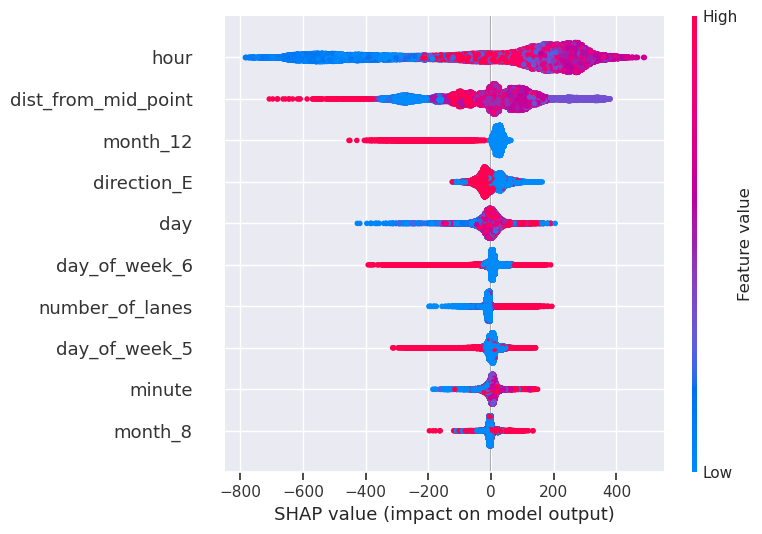

In [4]:
import xgboost as xgb

params = ml_help.params_to_dict("093_xgboost")
model = xgb.XGBRegressor(**params)

print("Fitting...")
start = time()
model.fit(X_train, y_train)
end = time()
print(f"Fitting... OK! Took {end - start} seconds")

print("Explaining...")
start = time()
explainer = shap.TreeExplainer(model)
end = time()
print(f"Explaining... OK! Took {end - start} seconds")

print("Calculating shap values...")
start = time()
shap_values = explainer.shap_values(X_test)
end = time()
print(f"Calculating shap values... OK! Took {end - start} seconds")

shap.summary_plot(shap_values, X_test, max_display=10, show=False)
xgboost_fig = pl.gcf()
pl.savefig("./plots/096_xgboost.eps", format="eps", bbox_inches="tight")
pl.savefig("./plots/096_xgboost.png", bbox_inches="tight")

# Random Forest

Fitting...
Fitting... OK! Took 17.129902839660645 seconds
Explaining...
Explaining... OK! Took 0.010885953903198242 seconds
Calculating shap values...
Calculating shap values... OK! Took 33.636534452438354 seconds


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


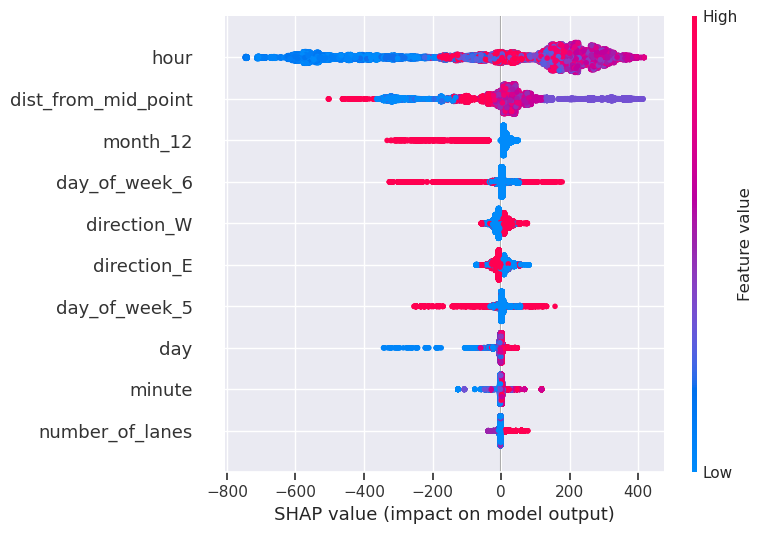

In [5]:
from sklearn.ensemble import RandomForestRegressor

params = ml_help.params_to_dict("093_random_forest")
model = RandomForestRegressor(**params)

print("Fitting...")
start = time()
model.fit(X_train, y_train)
end = time()
print(f"Fitting... OK! Took {end - start} seconds")

print("Explaining...")
start = time()
explainer = shap.TreeExplainer(model)
end = time()
print(f"Explaining... OK! Took {end - start} seconds")

print("Calculating shap values...")
start = time()
shap_values = explainer.shap_values(X_test)
end = time()
print(f"Calculating shap values... OK! Took {end - start} seconds")

shap.summary_plot(shap_values, X_test, max_display=10, show=False)
pl.savefig("./plots/096_random_forest.eps", format="eps", bbox_inches="tight")
pl.savefig("./plots/096_random_forest.png", bbox_inches="tight")

# Decision Tree

Fitting...
Fitting... OK! Took 0.26683759689331055 seconds
Explaining...
Explaining... OK! Took 0.0007135868072509766 seconds
Calculating shap values...
Calculating shap values... OK! Took 0.4011197090148926 seconds


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


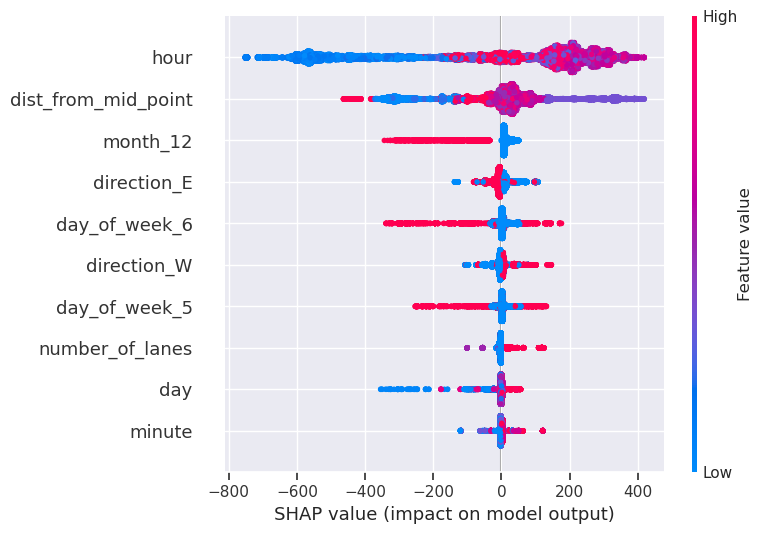

In [6]:
from sklearn.tree import DecisionTreeRegressor

params = ml_help.params_to_dict("093_decision_tree")
model = DecisionTreeRegressor(**params)

print("Fitting...")
start = time()
model.fit(X_train, y_train)
end = time()
print(f"Fitting... OK! Took {end - start} seconds")

print("Explaining...")
start = time()
explainer = shap.TreeExplainer(model)
end = time()
print(f"Explaining... OK! Took {end - start} seconds")

print("Calculating shap values...")
start = time()
shap_values = explainer.shap_values(X_test)
end = time()
print(f"Calculating shap values... OK! Took {end - start} seconds")

shap.summary_plot(shap_values, X_test, max_display=10, show=False)
pl.savefig("./plots/096_decision_tree.eps", format="eps", bbox_inches="tight")
pl.savefig("./plots/096_decision_tree.png", bbox_inches="tight")

# MLP

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


Fitting...
Fitting... OK! Took 459.3209764957428 seconds
Explaining...
Explaining... OK! Took 0.0008676052093505859 seconds
Calculating shap values...


X does not have valid feature names, but MLPRegressor was fitted with feature names


  0%|          | 0/29049 [00:00<?, ?it/s]

Calculating shap values... OK! Took 5787.259005069733 seconds


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


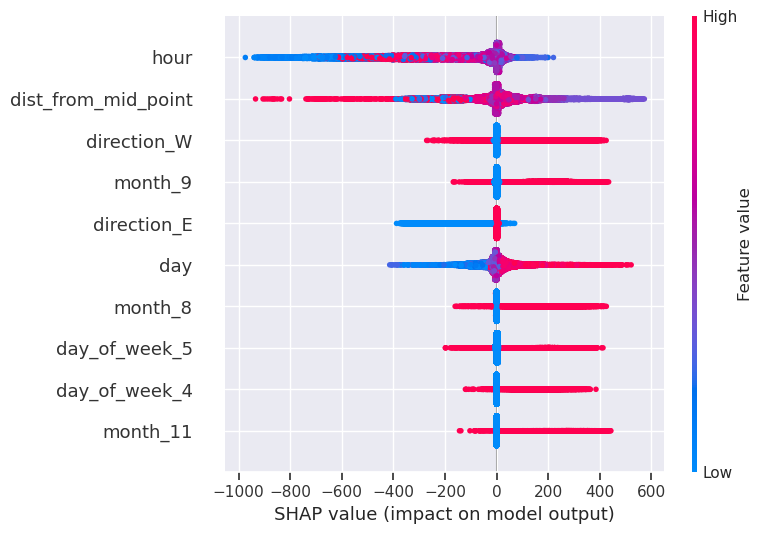

In [7]:
from sklearn.neural_network import MLPRegressor
import warnings

X_train_summary = shap.kmeans(X_train, 10)

params = ml_help.params_to_dict("093_mlpr")
model = MLPRegressor(**params)

print("Fitting...")
start = time()
model.fit(X_train, y_train)
end = time()
print(f"Fitting... OK! Took {end - start} seconds")

print("Explaining...")
start = time()
explainer = shap.KernelExplainer(model.predict, X_train_summary)
end = time()
print(f"Explaining... OK! Took {end - start} seconds")

print("Calculating shap values...")
start = time()
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    shap_values = explainer.shap_values(X_test)
end = time()
print(f"Calculating shap values... OK! Took {end - start} seconds")

shap.summary_plot(shap_values, X_test, max_display=10, show=False)
pl.savefig("./plots/096_mlp.eps", format="eps", bbox_inches="tight")
pl.savefig("./plots/096_mlp.png", bbox_inches="tight")